# Изучение, предварительная обработка, подготовка и сохранение данных

### 1. Загрузка необходимых библиотек, установка рабочей директории.

In [428]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.neighbors import NearestNeighbors
os.chdir(r'D:/projects_my/data_test')
os.getcwd();

### 2. Загрузка данных и отсеивание нерелевантных признаков.

In [429]:
#загружаем датасет, просматриваем признаки
df_raw = pd.read_csv(r"./2015-street-tree-census-tree-data.csv",sep=',')
df_raw.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

- Описание признаков. (-) - означает удаление столбца, (+) - перенос в новый датасет. Удаляются признаки, когторые уже при первичном просмотре не могут коррелировать с состоянием дерева, например, 'address' - Ближайший предполагаемый адрес к дереву и т. д.

- (-)'tree_id' - Уникальный идентификационный номер для каждого дерева.
- (-)'block_id' - Идентификатор, связывающий каждое дерево с блоком в таблице.
- (-)'created_at' - Дата переписи.
- (+)'tree_dbh' - Диаметр дерева. Данные собирались как для живых, так и для мертвых деревьев; для пней используйте stump_diam
- (+)'stump_diam' - Диаметр пня, измеренный через центр, округленный до ближайшего дюйма.
- (+)'curb_loc' - Расположение клумбы с деревьями по отношению к бордюру; деревья располагаются либо вдоль бордюра (OnCurb), либо смещены от бордюра (OffsetFromCurb)
- (+)'status' - Указывает, является ли дерево живым, мертвым или представляет собой пень.
- (+++)'health' - Указывает на состояние дерева.
- (-)'spc_latin' - Научное название вида, например, "Acer rubrum"
- (-)'spc_common' - Общее название видов, например, «красный клен»
- (-)'steward' - Указывает количество уникальных признаков, наблюдаемых для этого дерева. Не регистрируется для пней или мертвых деревьев.
- (+)'guards' - Указывает, присутствует ли предохранитель, и считает ли пользователь, что он полезен или вреден. Не регистрируется для мертвых деревьев и пней.
- (+)'sidewalk' - Указывает, был ли поврежден, треснул или поднят один из тротуарных флагов, непосредственно прилегающих к дереву. Не регистрируется для мертвых деревьев и пней.
- (-)'user_type' - В этом поле описывается категория пользователя, собравшего данные этой точки дерева.
- (+)'problems' - разные проблемы у дерева
- (+)'root_stone' - Указывает на наличие проблем с корнями, вызванных камнями.
- (+)'root_grate' - Указывает на наличие проблем с корнями, вызванных металлическими решетками.
- (+)'root_other' - Указывает на наличие других корневых проблем
- (+)'trunk_wire' - Указывает на наличие проблем, вызванных проводами
- (+)'trnk_light' - Указывает на наличие проблем со стволом, вызванных установленным на дереве освещением.
- (+)'trnk_other' - Указывает на наличие других проблем
- (+)'brch_light' - Указывает на наличие проблем с ветвями, вызванных освещением (обычно гирляндами) или проводами в ветвях.
- (+)'brch_shoe' - Указывает на наличие проблемы с веткой, вызванной кроссовками в ветках
- (+)'brch_other' - Указывает на наличие других проблем
- (-)'address' - Ближайший предполагаемый адрес к дереву
- (-)'postcode' - Пятизначный почтовый индекс, в котором находится дерево
- (-)'zip_city' - Город, как производное от почтового индекса. Часто (но не всегда) совпадает с городком.
- (-)'community board' - Общественный совет, в котором находится точка дерева
- (-)'borocode' - Код района, в котором находится Три-Пойнт: 1 (Манхэттен), 2 (Бронкс), 3 (Бруклин), 4 (Квинс), 5 (Стейтен-Айленд)
- (-)'borough' - Название района, в котором находится точка выращивания деревьев
- (-)'cncldist' - Район совета, в котором находится точка дерева
- (-)'st_assem' - Округ законодательного собрания штата, в котором находится точка с деревом
- (-)'st_senate' - Округ Сената штата, в котором находится точка дерева
- (-)'nta' - Это код NTA, соответствующий району табулирования переписи населения США 2010 года, в который попадает точка дерева.
- (-)'nta_name' - Это название NTA, соответствующее районной области табулирования переписи населения США 2010 года, в которую попадает точка дерева.
- (-)'boro_ct' - Это идентификатор переписного участка, в который попадает точка дерева
- (-)'state' - Всем функциям присвоено значение «Нью-Йорк»
- (+)'latitude' - Широта точки, в десятичных градусах 
- (+)'longitude' - Долгота точки, в десятичных градусах
- (+)'x_sp' - Координата X в плоскости состояния. Единицы измерения — футы
- (+)'y_sp' - Координата Y, в плоскости состояния. Единицы измерения — футы.
- (-)'council district' - без описания
- (-)'census tract' - без описания
- (-)'bin' - без описания
- (-)'bbl' - без описания

### 3. Создание нового датасета из отобранных признаков и его анализ

In [430]:
# список нерелевантных признаков
act_col_list = ['tree_id', 'block_id', 'created_at', 'spc_latin', 'spc_common', 'steward', 'user_type', 'address', 'postcode', 'zip_city',
                'community board', 'borocode', 'borough', 'cncldist','st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 
                'state', 'council district', 'census tract', 'bin', 'bbl']

In [431]:
# удаляем эти признаки из датасета
df_act = df_raw.drop(columns=act_col_list)
df_act.columns

Index(['tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'guards',
       'sidewalk', 'problems', 'root_stone', 'root_grate', 'root_other',
       'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe',
       'brch_other', 'latitude', 'longitude', 'x_sp', 'y_sp'],
      dtype='object')

- Сначала проанализируем колонку с целевыми метками - удалим некорректные значения и посмотрим распределение деревьев по классам их состония

In [432]:
# выводим список уникальных меток в столбце
df_act.health.unique()

array(['Fair', 'Good', 'Poor', nan], dtype=object)

In [433]:
# определяем количество NaN среди целевыхб меток
df_act.health.isnull().sum()

np.int64(31616)

In [434]:
# удаляем строки данных датасета, содержащие NaN в 'health'
df_act.dropna(axis=0, subset='health', inplace=True, ignore_index=True)

In [435]:
# выводим распределение данных по классам
df_act.health.value_counts(normalize=1)

health
Good    0.810906
Fair    0.147973
Poor    0.041121
Name: proportion, dtype: float64

- В данных присутствует сильный дисбаланс по классам, что будет крайне отрицательно сказываеться на классификации. Чтобы попытаться получить от сути осмысленные результаты будем создавать несколько датасетов для обучения, валидации и тестирования - полный, где будут присутствовать все отобранные данные; сбалансированный, где данные будут выбираться из исходного датасета так, чтобы их количество в классах было примерно ожинаковым; и такие же датасеты, с двумя классами - 'Good' и 'Fair' + 'Poor'. 

In [436]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652172 entries, 0 to 652171
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   tree_dbh    652172 non-null  int64  
 1   stump_diam  652172 non-null  int64  
 2   curb_loc    652172 non-null  object 
 3   status      652172 non-null  object 
 4   health      652172 non-null  object 
 5   guards      79866 non-null   object 
 6   sidewalk    652171 non-null  object 
 7   problems    225844 non-null  object 
 8   root_stone  652172 non-null  object 
 9   root_grate  652172 non-null  object 
 10  root_other  652172 non-null  object 
 11  trunk_wire  652172 non-null  object 
 12  trnk_light  652172 non-null  object 
 13  trnk_other  652172 non-null  object 
 14  brch_light  652172 non-null  object 
 15  brch_shoe   652172 non-null  object 
 16  brch_other  652172 non-null  object 
 17  latitude    652172 non-null  float64
 18  longitude   652172 non-null  float64
 19  x_

- Датасет в основном представлен категориальными данными. Из количественных только - tree_dbh, stump_diam, x_sp, y_sp, latitude, longitude. Но последние - долгота и широта - однозначно связаны с декартовыми координатами x_sp, y_sp.
##### Cначал изучим категориальные данные. Посмотрим распределения, удалим строки, содержащие NaN и перейдём от строковых категорий к целочисленным, например, 'No' - 0, 'Yes' - 1

In [437]:
# выводим массив уникальных категорий, распределение по категорим, проверям наличие NaN
df_act.curb_loc.unique(), df_act.curb_loc.value_counts(normalize=1), df_act.curb_loc.isnull().sum()

(array(['OnCurb', 'OffsetFromCurb'], dtype=object),
 curb_loc
 OnCurb            0.960325
 OffsetFromCurb    0.039675
 Name: proportion, dtype: float64,
 np.int64(0))

In [438]:
# выводим распределение по целевым меткам внутри категорий
df_act.groupby('curb_loc').health.value_counts(normalize=1)

curb_loc        health
OffsetFromCurb  Good      0.806841
                Fair      0.155942
                Poor      0.037217
OnCurb          Good      0.811074
                Fair      0.147644
                Poor      0.041282
Name: proportion, dtype: float64

In [439]:
# переобозначаем категории
df_act.curb_loc = df_act.curb_loc.map({'OnCurb': 0, 'OffsetFromCurb': 1})

In [440]:
# выводим массив уникальных категорий
df_act.status.unique()

array(['Alive'], dtype=object)

In [441]:
# удаляем этот признак, т.к. у него осталась только одна категория - 'alive' после очистки столбца 'health'
df_act.drop(columns=['status'], inplace=True)

In [442]:
# выводим массив уникальных категорий
df_act.guards.unique()

array([nan, 'Helpful', 'Harmful', 'Unsure'], dtype=object)

In [443]:
# выводим распределение по категорим, подсчитываем количество NaN
df_act.guards.value_counts(normalize=1), df_act.guards.isnull().sum()

(guards
 Helpful    0.649413
 Harmful    0.253575
 Unsure     0.097012
 Name: proportion, dtype: float64,
 np.int64(572306))

In [444]:
# удаляем признак, т.к. основная масса данных в нём - мусор
df_act.drop(columns=['guards'], inplace=True)

In [445]:
# выводим массив уникальных категорий
df_act.sidewalk.unique()

array(['NoDamage', 'Damage', nan], dtype=object)

In [446]:
# выводим распределение по категорим, подсчитываем количество NaN
df_act.sidewalk.value_counts(normalize=1), df_act.sidewalk.isnull().sum()   

(sidewalk
 NoDamage    0.712969
 Damage      0.287031
 Name: proportion, dtype: float64,
 np.int64(1))

In [447]:
# удаляем строку с NaN, переобозначаем категории
df_act.dropna(axis=0, subset='sidewalk', inplace=True, ignore_index=True)
df_act.sidewalk = df_act.sidewalk.map({'NoDamage': 0, 'Damage': 1})

In [448]:
# выводим распределение по категорим, подсчитываем количество NaN
df_act.problems.value_counts(normalize=1), df_act.problems.isnull().sum()

(problems
 Stones                                                                          0.423624
 BranchLights                                                                    0.130409
 Stones,BranchLights                                                             0.078851
 RootOther                                                                       0.050557
 TrunkOther                                                                      0.049339
                                                                                   ...   
 Stones,MetalGrates,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther    0.000004
 WiresRope,BranchLights,Sneakers                                                 0.000004
 MetalGrates,WiresRope,TrunkLights                                               0.000004
 Stones,RootOther,TrunkLights,TrunkOther,BranchOther                             0.000004
 MetalGrates,TrunkOther,Sneakers                                                 0.000004


In [449]:
# удаляем признак, т.к. основная масса данных в нём - мусор
df_act.drop(columns=['problems'], inplace=True)

In [450]:
# выводим информацию по оставшимся категориальным признакам
df_act[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']].describe()

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
count,652171,652171,652171,652171,652171,652171,652171,652171,652171
unique,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No
freq,512172,648635,621849,638897,651140,619598,589806,651760,627816


In [451]:
# подсчитываем количество NaN
df_act[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']].isnull().sum()

root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

In [452]:
# удаляем признаки, где практически все значения принадлежат одной категории, например, 'trnk_light', где более 99% - 'No'
df_act.drop(columns=['root_grate', 'trnk_light', 'brch_shoe'], inplace=True)

In [453]:
# переобозначаем категории
df_act['root_stone'] = df_act['root_stone'].map({'No': 0, 'Yes': 1})
df_act['root_other'] = df_act['root_other'].map({'No': 0, 'Yes': 1})
df_act['trunk_wire'] = df_act['trunk_wire'].map({'No': 0, 'Yes': 1})
df_act['trnk_other'] = df_act['trnk_other'].map({'No': 0, 'Yes': 1})
df_act['brch_light'] = df_act['brch_light'].map({'No': 0, 'Yes': 1})
df_act['brch_other'] = df_act['brch_other'].map({'No': 0, 'Yes': 1})

In [454]:
# находим индексы строк в категориальных данных, все признаки (значения) в которых равны нулю
categorical_cols = ['curb_loc', 'sidewalk', 'root_stone',
       'root_other', 'trunk_wire', 'trnk_other', 'brch_light', 'brch_other']
inds = df_act.index[df_act[categorical_cols].eq(0).all(axis=1)]

In [455]:
# подсчитываем их количество
(df_act[categorical_cols] == 0).all(axis=1).sum()

np.int64(331589)

In [456]:
# удаляем категорильные признаки, т.к. около половины из них имеют одинаковые значения
df_act.drop(columns=[*categorical_cols], inplace=True)

##### В качестве промежуточного вывода отметим, что категориальные данные не могут быть использованы для обучения сети т.к.:
- около половины строк (деревье) имеют одинаковые значения признаков - все отрицательные. Для нейронной сети все эти точки будут одинаковыми, что не позволит ей обучаться;
- в принципе для задачи классификации такие данные не подходят, т.к. большая часть деревья, принадлежащих разным целевым классам имеют одинаковые признаки, что, в свою очередь, не позволит их однозначно отнести к какому-либо одному классу;
- применительно к категориальным данным можно было бы пропробовать "зацепиться" за ранее исключённый из рассмотрения признак - названия деревьев. При помощи one-hot encoding получить числовые значения, кодирующие названия и попробовать обучить сеть. Но такой подход будет сталкиваться с той же проблемой - одно и то же дерево (one-hot vector) будет принаблежать разным целевым классам.

##### Теперь перейдём к анализу и подготовке количественных данных

- Диаметр дерева

In [457]:
# выводим статистику по этому признаку
df_act.tree_dbh.describe()

count    652171.000000
mean         11.709486
std           8.634249
min           0.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

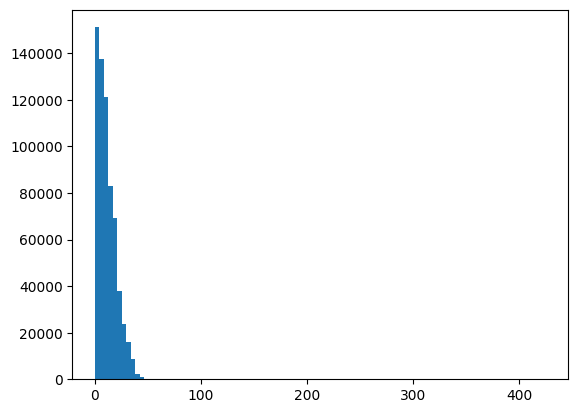

In [458]:
# Вывим гистограмму
_, _, _ = plt.hist(df_act.tree_dbh, bins=100)

In [459]:
# вычисляем количество выбросов
(df_act.tree_dbh >= 40).sum()

np.int64(3099)

In [460]:
# выводим статичтику по выбросам
df_act[df_act.tree_dbh >= 40].health.value_counts(normalize=1)

health
Good    0.889642
Fair    0.094547
Poor    0.015812
Name: proportion, dtype: float64

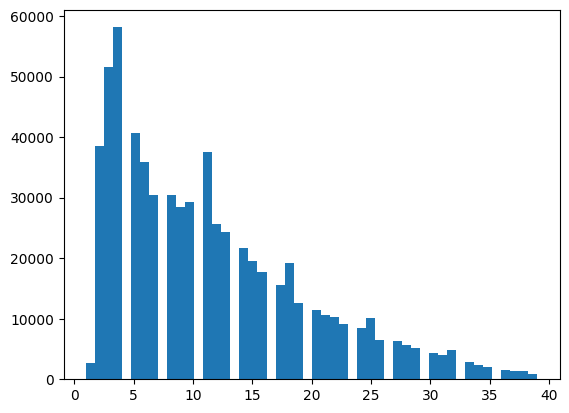

In [461]:
#Удаляем выбросы, т.к. в основном они состоят из класса 'Good', что не усилит дисбаланс классов.
# Также удаляем нули - мысор в данных
df_act.drop(labels=np.where(df_act.tree_dbh >= 40)[0], axis=0, inplace=True)
df_act.reset_index(inplace=True, drop=True)
df_act.drop(labels=np.where(df_act.tree_dbh == 0)[0], axis=0, inplace=True)
df_act.reset_index(inplace=True, drop=True)
_, _, _ = plt.hist(df_act.tree_dbh, bins=50)

- Диаметр пня

In [462]:
# выводим статистику по диаметра пня
df_act.stump_diam.describe()

count    648850.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: stump_diam, dtype: float64

In [463]:
#Все значения после предыдущих очисток равны нулю - удаляем столбец
df_act.drop(columns=['stump_diam'], inplace=True)

- Координаты деревьев в декартовой системе координат и на сфере (долгота и широта)
- Декартовы координаты и долгота с широтой связаны функциональной зависимостью с точностью до отличия элемнта плоскости от чем можно пренебречь в рамках задачи. Поэтому имеет смысл избавиться от колонок со значениями долготы и широты. Проверим это - между соответствующими величинами должна быть сильная корреляция. И построим scatter plot - они должны выглядеть одинаково для обоих наборов координат

In [464]:
# выводим корреляцию между признаками
df_act[['latitude',
       'longitude', 'x_sp', 'y_sp']].corr(method='spearman')

,latitude,longitude,x_sp,y_sp
latitude,1.000000,0.515256,0.514511,0.999999
longitude,0.515256,1.000000,0.999999,0.515908
x_sp,0.514511,0.999999,1.000000,0.515162
y_sp,0.999999,0.515908,0.515162,1.000000


In [465]:
# Сильная корреляция latitude-y_sp и longitude-x_sp
# выводим минимальные и максимальные значения долгот и широт
df_act.latitude.min(), df_act.latitude.max(), df_act.longitude.min(), df_act.longitude.max()

(np.float64(40.49846614),
 np.float64(40.91291831),
 np.float64(-74.2549647),
 np.float64(-73.70048817))

In [466]:
# выводим минимальные и максимальные значения координат
df_act.x_sp.min(), df_act.x_sp.max(), df_act.y_sp.min(), df_act.y_sp.max()

(np.float64(913349.2661),
 np.float64(1067247.624),
 np.float64(120973.7922),
 np.float64(271894.0921))

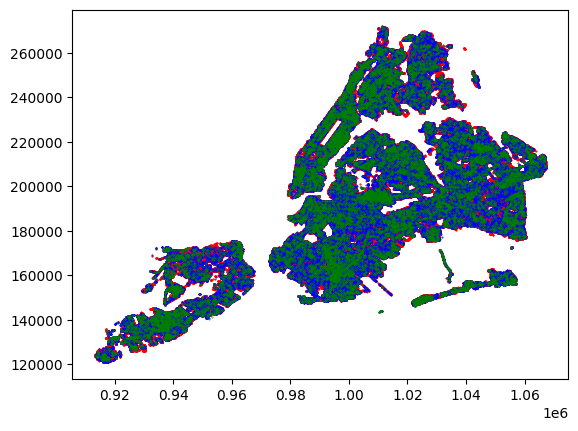

In [467]:
# строим scatter plot (должен повторять карту Нью-Йорка) для значений декартовый координат
x_good, y_good = df_act.x_sp[df_act.health == 'Good'], df_act.y_sp[df_act.health == 'Good']
x_fair, y_fair = df_act.x_sp[df_act.health == 'Fair'], df_act.y_sp[df_act.health == 'Fair']
x_poor, y_poor = df_act.x_sp[df_act.health == 'Poor'], df_act.y_sp[df_act.health == 'Poor']
plt.scatter(x_good, y_good, s=0.3, c='r')
plt.scatter(x_fair, y_fair, s=0.2, c='b')
plt.scatter(x_poor, y_poor, s=0.1, c='g')
plt.show()

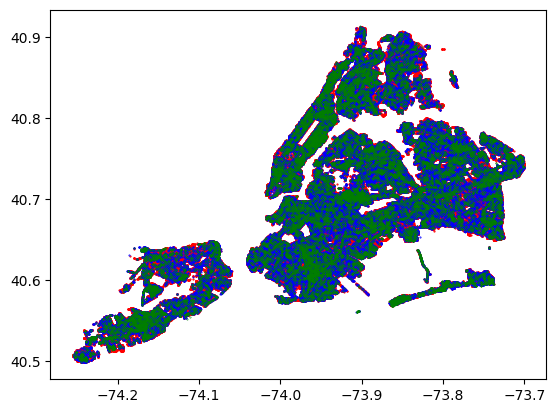

In [468]:
# строим scatter plot (должен повторять карту Нью-Йорка) для значений долгот и широт
lat_good, long_good = df_act.latitude[df_act.health == 'Good'], df_act.longitude[df_act.health == 'Good']
lat_fair, long_fair = df_act.latitude[df_act.health == 'Fair'], df_act.longitude[df_act.health == 'Fair']
lat_poor, long_poor = df_act.latitude[df_act.health == 'Poor'], df_act.longitude[df_act.health == 'Poor']
plt.scatter(long_good, lat_good, s=0.3, c='r')
plt.scatter(long_fair, lat_fair, s=0.2, c='b')
plt.scatter(long_poor, lat_poor, s=0.1, c='g')
plt.show()

In [469]:
# Удаляем столбцы с долготами и широтами
df_act.drop(columns=['latitude', 'longitude'], inplace=True)
df_act.columns

Index(['tree_dbh', 'health', 'x_sp', 'y_sp'], dtype='object')

In [470]:
# проверям наличие дублированных элементов для x_sp
df_act.x_sp.value_counts()

x_sp
1.050550e+06    35
9.406974e+05    27
1.052818e+06    17
9.962435e+05    17
1.040292e+06    11
                ..
9.871279e+05     1
9.922386e+05     1
9.330225e+05     1
1.015924e+06     1
1.032772e+06     1
Name: count, Length: 646907, dtype: int64

In [471]:
# проверям наличие дублированных элементов для y_sp
df_act.y_sp.value_counts()

y_sp
179953.5509    35
161910.8114    27
190562.4395    17
163692.3397    17
222968.9875    11
               ..
156296.4745     1
225693.6953     1
156272.0015     1
249382.4891     1
228644.8374     1
Name: count, Length: 647806, dtype: int64

In [472]:
# получаем индексы дубликатов
x_dup = np.where(df_act.x_sp.duplicated() == True)[0]
y_dup = np.where(df_act.y_sp.duplicated() == True)[0]

In [473]:
# т.к. число дубликатов разное для x_sp и y_sp, то добавим их в списки, чтобы посмотреть примеры
list_same = []; list_not_same = []; temp_list = []
for val in x_dup:
    temp_list.append(val)
    inds = np.where(df_act.y_sp == df_act.y_sp[val])[0]
    if inds.shape[0] == 1:
        x_ind = np.where(df_act.x_sp == df_act.x_sp[val])[0]
        if val in temp_list:
            list_not_same.append([val, x_ind])
        continue
    else:
        if val in temp_list:
            list_same.append([val, inds])

In [474]:
# пример значений координат, где, очевидно, допущена ошибка в определение  координты y_sp
df_act[['x_sp', 'y_sp']].loc[list_not_same[0][1]]

,x_sp,y_sp
12797,989180.2139,220667.9655
14743,989180.2139,220707.3654


In [475]:
# аналогичный пример
df_act[['x_sp', 'y_sp']].loc[list_not_same[35][1]]

,x_sp,y_sp
85491,1014131.162,241412.9936
85607,1014131.162,241345.9937
85717,1014131.162,241391.5937
85783,1014131.162,241284.5936
86041,1014131.162,241306.1939
86708,1014131.162,241487.9935
86892,1014131.162,241327.5935
86893,1014131.162,241369.5934
98734,1014131.162,241215.7939


In [476]:
# пример полного дублирования координат деревьев
df_act[['x_sp', 'y_sp']].loc[list_same[0][1]]

,x_sp,y_sp
104,994405.4269,233951.0486
3715,994405.4269,233951.0486


In [477]:
# аналогичный пример
df_act[['x_sp', 'y_sp']].loc[list_same[15][1]]

,x_sp,y_sp
57617,996243.4593,163692.3397
58733,996243.4593,163692.3397
59299,996243.4593,163692.3397
59300,996243.4593,163692.3397
60677,996243.4593,163692.3397
60807,996243.4593,163692.3397
60970,996243.4593,163692.3397
61358,996243.4593,163692.3397
61366,996243.4593,163692.3397
61487,996243.4593,163692.3397


- Разное количество дубликатов обусловлено небольшими ошибками в определение координат деревьев

In [478]:
# удаляем дубликаты
df_act.drop_duplicates(subset=['x_sp'], inplace=True, ignore_index=True)
df_act.drop_duplicates(subset=['y_sp'], inplace=True, ignore_index=True)

### 4. Подготовка итоговых данных и их сохранение

In [479]:
df_act.head()

,tree_dbh,health,x_sp,y_sp
0,3,Fair,1027431.148,202756.7687
1,21,Fair,1034455.701,228644.8374
2,3,Good,1001822.831,200716.8913
3,10,Good,1002420.358,199244.2531
4,21,Good,990913.775,182202.4260


In [480]:
# Переобозначем классы числовыми метками
health_classes = {'Good': 0, 'Fair': 1, 'Poor': 2}
df_act.health = df_act.health.map(health_classes)

- В отличие от изображений, где масштаб интенсивностей пикселей известен заранее, вне зависимости от их природы, например, [0; 255], здесь координаты могут иметь доволь произвольные значения относительно райнов Нью-Йорка, как и диаметр деревьев (хотя последний был ограничен потолком в 40). Поэтому уже здесь отмасштабируем данные к интервалу [0; 1].

In [481]:
# Масштабируем данные
df_act['x_sp'] = minmax_scale(df_act['x_sp'])
df_act['y_sp'] = minmax_scale(df_act['y_sp'])
df_act['tree_dbh'] = minmax_scale(df_act['tree_dbh'])

- Как ранее указывалось, в данных существует две проблемы - дисбаланс (более 80% это здоровые деревья) классов и сильное смещение значений признаков к какому-либо одному значению (характерно для категориальных). Если второя проблема отсутствует в количественных данных, то для первого случая уместно будет попробовать следующие вещи: помимо разбиения на три класса также рассмотреть разбиение на два класса - 'Good' и 'Fair' + 'Poor'. В таком датасете всё равно сохраниться сильный перекос в сторону класса 'Good', но он уже будет сглаживаться тем, что количество деревьев второго класса увеличилось - 'Fair' + 'Poor'. Также имеет смысл из исходного датасета сделать выборки меньше размера, где количество деревьев, принадлежащих разным классам будет примерно одинаковым. Однако, следует отметить, что это не гарантирует положительного эффекта для обучения, т.к. для такого количества признаков сеть просто может не найти корреляции.

In [482]:
# Создаём второй детесет для двухклассовой классификации - копирем основной и меняем в нём метки классов 2 на 1
df_act_2_classes = df_act.copy()
df_act_2_classes.health = df_act_2_classes.health.map({0: 0, 1: 1, 2: 1})

In [483]:
# преобразовываем слобец 'health' в numpy массив меток классов
targets_xy = df_act.health.to_numpy()
targets_xy_2_cl = df_act_2_classes.health.to_numpy()

In [484]:
# преобразовываем слобец 'tree_dbh', содержащий данные о диаметрах деревьев, в numpy массив 
tree_diam = df_act['tree_dbh'].to_numpy()

- Здесь создадим ещё один датасет для сети. Это связано с тем, что в существующем датасете мало входных признаков для сети - всего три. Если учесть, как неструктурированно располагаются деревья по городу (см. scatter plot) и то, что диаметр дерева скорее всего никак не связан с его координатами, то не стоит ожидать, что сеть найдёт в этих данных какую-либо зависимость. Поэтом попробуем предположить, что если и есть какие-либо объективные факторы, влияющие на состояние деревьев, то они будут влиять и на ближайших ихб соседей. Поэтому найдём расстояние до 30 (число можно варьировать) ближайших соседей каждого дерева и будем использовать этот датасет для обучения.

In [485]:
# преобразовываем слобец 'tree_dbh', содержащий данные о координатах деревьев, в numpy массив. Затем находим расстояние
# до 30 ближайших соседей для каждого дерева. В метод передаётся 31, т.к. само дерево также учитывается и метод всегда будет
# выдавать первым значением 0 - его далее исключим
xy_nparr = df_act[['x_sp', 'y_sp']].to_numpy()
k_neighbors = NearestNeighbors(n_neighbors=31, metric='minkowski', p=2, n_jobs=8)
k_neighbors.fit(xy_nparr)
dists_data = k_neighbors.kneighbors(xy_nparr)[0]

In [486]:
# удаляем нули - расстояние дерева до самого себя
dists_data = np.delete(dists_data, 0, axis=1)

In [487]:
# формаруем данные в массивы соответствующих размерностей и типов
xy_diam_data = np.concatenate((xy_nparr, tree_diam[:, np.newaxis]), axis=1)
xy_diam_data = xy_diam_data.astype(dtype=np.float32)
dists_data = dists_data.astype(dtype=np.float32)

In [488]:
# директория для сохранения данных
os.chdir(r'D:\projects_my\data_test')

In [489]:
targets_xy.shape

(646252,)

In [490]:
# разбиваем данные на тренировочные и тестовые для случая трёх классовых меток
tr_xyd_3_cl, test_xyd_3_cl, tr_target_xyd_3_cl, test_target_xyd_3_cl = train_test_split(xy_diam_data, targets_xy, train_size=0.8, test_size=0.2)
tr_dists_3_cl, test_dists_3_cl, tr_target_dists_3_cl, test_target_dists_3_cl = train_test_split(dists_data, targets_xy, train_size=0.8, test_size=0.2)

In [491]:
# разбиваем данные на тренировочные и тестовые для случая двух классовых меток
tr_xyd_2_cl, test_xyd_2_cl, tr_target_xyd_2_cl, test_target_xyd_2_cl = train_test_split(xy_diam_data, targets_xy_2_cl, train_size=0.8, test_size=0.2)
tr_dists_2_cl, test_dists_2_cl, tr_target_dists_2_cl, test_target_dists_2_cl = train_test_split(dists_data, targets_xy_2_cl, train_size=0.8, test_size=0.2)

In [492]:
import time

- Сохраняем результаты - координаты с диаметрами, расстояния и категориальные данные - для случая трёх классов. Здесь данные сохраняются следующим образом: в папку с названием, соответствующим номеру класса, данные об одном дереве сохраняются один файлом

In [785]:
t1 = time.time()
for cl_label in range(tr_target_xyd_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_3_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_3_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_3_cl == cl_label)[0]
    for i in inds:#range(tr_xyd_3_cl.shape[0]):#inds:
        #if tr_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/xyd_3_classes/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_xyd_3_cl[i])
        
for cl_label in range(test_target_xyd_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_3_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_3_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_3_cl == cl_label)[0]
    for i in inds:#range(test_xyd_3_cl.shape[0]):#inds:
        #if test_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/xyd_3_classes/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_xyd_3_cl[i])
time.time() - t1

148.0012948513031

In [786]:
t1 = time.time()
for cl_label in range(tr_target_dists_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/dists_3_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_3_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_3_cl == cl_label)[0]
    for i in inds:#range(tr_xyd_3_cl.shape[0]):#inds:
        #if tr_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/dists_3_classes/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_dists_3_cl[i])
        
for cl_label in range(test_target_dists_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/dists_3_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_3_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_3_cl == cl_label)[0]
    for i in inds:#range(test_xyd_3_cl.shape[0]):#inds:
        #if test_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/dists_3_classes/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_dists_3_cl[i])
time.time() - t1

168.50161862373352

Тоже самое, но для случая двух классов

In [787]:
t1 = time.time()
for cl_label in range(tr_target_xyd_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_2_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_2_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_2_cl == cl_label)[0]
    for i in inds:#range(tr_xyd_2_cl.shape[0]):#inds:
        #if tr_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/xyd_2_classes/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_xyd_2_cl[i])
        
for cl_label in range(test_target_xyd_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_2_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_2_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_2_cl == cl_label)[0]
    for i in inds:#range(test_xyd_2_cl.shape[0]):#inds:
        #if test_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/xyd_2_classes/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_xyd_2_cl[i])
time.time() - t1

186.61753726005554

In [788]:
t1 = time.time()
for cl_label in range(tr_target_dists_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/dists_2_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_2_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_2_cl == cl_label)[0]
    for i in inds:#range(tr_xyd_2_cl.shape[0]):#inds:
        #if tr_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/dists_2_classes/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_dists_2_cl[i])
        
for cl_label in range(test_target_dists_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/dists_2_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_2_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_2_cl == cl_label)[0]
    for i in inds:#range(test_xyd_2_cl.shape[0]):#inds:
        #if test_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/dists_2_classes/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_dists_2_cl[i])
time.time() - t1

180.3736011981964

- Здесь сохраним те же данные, но одним файлом, соответствующим классу. Класс Dataset будет реализован таким образом, что сможет работать как с одним сохранённым файлом, так и с множеством. Это делается с целью ускорения обучения сети, т.к. размер данных небольшой и их можно сразу хранить в ОЗУ. 

In [789]:
t1 = time.time()
for cl_label in range(tr_target_xyd_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_3_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_3_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_3_cl == cl_label)[0]
    with open(r'./datasets/one_file/xyd_3_classes/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_xyd_3_cl[inds])
        
for cl_label in range(test_target_xyd_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_3_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_3_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_3_cl == cl_label)[0]
    with open(r'./datasets/one_file/xyd_3_classes/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_xyd_3_cl[inds])
time.time() - t1

t1 = time.time()
for cl_label in range(tr_target_dists_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_3_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_3_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_3_cl == cl_label)[0]
    with open(r'./datasets/one_file/dists_3_classes/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_dists_3_cl[inds])
        
for cl_label in range(test_target_dists_3_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_3_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_3_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_3_cl == cl_label)[0]
    with open(r'./datasets/one_file/dists_3_classes/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_dists_3_cl[inds])
time.time() - t1
###################################################
t1 = time.time()
for cl_label in range(tr_target_xyd_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_2_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_2_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_2_cl == cl_label)[0]
    with open(r'./datasets/one_file/xyd_2_classes/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_xyd_2_cl[inds])
        
for cl_label in range(test_target_xyd_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_2_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_2_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_2_cl == cl_label)[0]
    with open(r'./datasets/one_file/xyd_2_classes/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_xyd_2_cl[inds])
time.time() - t1

t1 = time.time()
for cl_label in range(tr_target_dists_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_2_classes/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_2_classes/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_2_cl == cl_label)[0]
    with open(r'./datasets/one_file/dists_2_classes/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_dists_2_cl[inds])
        
for cl_label in range(test_target_dists_2_cl.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_2_classes/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_2_classes/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_2_cl == cl_label)[0]
    with open(r'./datasets/one_file/dists_2_classes/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_dists_2_cl[inds])
time.time() - t1

0.3371005058288574

- Далее проделывается та же процедура формирования и сохранения данных, но для случая сбалансированных классов.

In [495]:
# создаются примерно равные выборки из основного датасета для каждого класса
temp_sample_0_3cl = df_act[['health', 'tree_dbh', 'x_sp', 'y_sp']][df_act.health == 0].sample(df_act.health[df_act.health == 2].shape[0] + 3000)
temp_sample_1_3cl = df_act[['health', 'tree_dbh', 'x_sp', 'y_sp']][df_act.health == 1].sample(df_act.health[df_act.health == 2].shape[0] + 1000)
temp_sample_2_3cl = df_act[['health', 'tree_dbh', 'x_sp', 'y_sp']][df_act.health == 2]

temp_sample_0_2cl = df_act_2_classes[['health', 'tree_dbh', 'x_sp', 'y_sp']][df_act_2_classes.health == 0].sample(df_act_2_classes.health[df_act_2_classes.health == 1].shape[0] + 11000)
temp_sample_1_2cl = df_act_2_classes[['health', 'tree_dbh', 'x_sp', 'y_sp']][df_act_2_classes.health == 1]

In [496]:
# создаются новые датасеты для случаем трёх и двух целевых классов
df_3cl_balanced = pd.concat([temp_sample_0_3cl, temp_sample_1_3cl, temp_sample_2_3cl], ignore_index=True)
df_2cl_balanced = pd.concat([temp_sample_0_2cl, temp_sample_1_2cl], ignore_index=True)

In [497]:
# создаются numpy массивы с целевыми метками
targets_xy_bal = df_3cl_balanced.health.to_numpy()
targets_xy_2_cl_bal = df_2cl_balanced.health.to_numpy()

In [498]:
# создаются numpy массивы координат деревьев и их диаметров
tree_diam_3cl_bal = df_3cl_balanced['tree_dbh'].to_numpy()
tree_diam_2cl_bal = df_2cl_balanced['tree_dbh'].to_numpy()

xy_nparr_3cl_bal = df_3cl_balanced[['x_sp', 'y_sp']].to_numpy()
xy_nparr_2cl_bal = df_2cl_balanced[['x_sp', 'y_sp']].to_numpy()

In [499]:
# поиск 30 ближайших соседей
k_neighbors_3cl_bal = NearestNeighbors(n_neighbors=31, metric='minkowski', p=2, n_jobs=8)
k_neighbors_3cl_bal.fit(xy_nparr_3cl_bal)
dists_arr_3cl_bal = k_neighbors_3cl_bal.kneighbors(xy_nparr_3cl_bal)[0]

k_neighbors_2cl_bal = NearestNeighbors(n_neighbors=31, metric='minkowski', p=2, n_jobs=8)
k_neighbors_2cl_bal.fit(xy_nparr_2cl_bal)
dists_arr_2cl_bal = k_neighbors_2cl_bal.kneighbors(xy_nparr_2cl_bal)[0]

In [500]:
# удаление расстояний до самих себя
dists_arr_3cl_bal = np.delete(dists_arr_3cl_bal, 0, axis=1)
dists_arr_2cl_bal = np.delete(dists_arr_2cl_bal, 0, axis=1)

In [501]:
# формаруем данные в массивы соответствующих размерностей и типов
xyd_3cl_bal_data = np.concatenate((xy_nparr_3cl_bal, tree_diam_3cl_bal[:, np.newaxis]), axis=1)
xyd_3cl_bal_data = xyd_3cl_bal_data.astype(dtype=np.float32)
dists_3cl_bal_data = dists_arr_3cl_bal.astype(dtype=np.float32)

xyd_2cl_bal_data = np.concatenate((xy_nparr_2cl_bal, tree_diam_2cl_bal[:, np.newaxis]), axis=1)
xyd_2cl_bal_data = xyd_2cl_bal_data.astype(dtype=np.float32)
dists_2cl_bal_data = dists_arr_2cl_bal.astype(dtype=np.float32)

In [502]:
# разбиваем данные на тренировочные и тестовые для случая трёх классовых меток
tr_xyd_3cl_bal, test_xyd_3cl_bal, tr_target_xyd_3cl_bal, test_target_xyd_3cl_bal = train_test_split(xyd_3cl_bal_data, targets_xy_bal, train_size=0.8, test_size=0.2)
tr_dists_3cl_bal, test_dists_3cl_bal, tr_target_dists_3cl_bal, test_target_dists_3cl_bal = train_test_split(dists_3cl_bal_data, targets_xy_bal, train_size=0.8, test_size=0.2)

In [503]:
# разбиваем данные на тренировочные и тестовые для случая двух классовых меток
tr_xyd_2cl_bal, test_xyd_2cl_bal, tr_target_xyd_2cl_bal, test_target_xyd_2cl_bal = train_test_split(xyd_2cl_bal_data, targets_xy_2_cl_bal, train_size=0.8, test_size=0.2)
tr_dists_2cl_bal, test_dists_2cl_bal, tr_target_dists_2cl_bal, test_target_dists_2cl_bal = train_test_split(dists_2cl_bal_data, targets_xy_2_cl_bal, train_size=0.8, test_size=0.2)

- Сохраняем результаты - координаты с диаметрами, расстояния и категориальные данные - для случая трёх сбалансированных классов. Здесь данные сохраняются следующим образом: в папку с названием, соответствующим номеру класса, данные об одном дереве сохраняются один файлом

In [790]:
t1 = time.time()
for cl_label in range(tr_target_xyd_3cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_3_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_3_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_3cl_bal == cl_label)[0]
    for i in inds:#range(tr_xyd_3_cl.shape[0]):#inds:
        #if tr_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/xyd_3_classes_balanced/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_xyd_3cl_bal[i])
        
for cl_label in range(test_target_xyd_3cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_3_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_3_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_3cl_bal == cl_label)[0]
    for i in inds:#range(test_xyd_3_cl.shape[0]):#inds:
        #if test_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/xyd_3_classes_balanced/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_xyd_3cl_bal[i])
time.time() - t1

25.56549882888794

In [791]:
t1 = time.time()
for cl_label in range(tr_target_dists_3cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/dists_3_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_3_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_3cl_bal == cl_label)[0]
    for i in inds:#range(tr_xyd_3_cl.shape[0]):#inds:
        #if tr_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/dists_3_classes_balanced/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_dists_3cl_bal[i])
        
for cl_label in range(test_target_dists_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/dists_3_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_3_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_2cl_bal == cl_label)[0]
    for i in inds:#range(test_xyd_3_cl.shape[0]):#inds:
        #if test_target_xyd_3_cl[i] == cl_label:
            with open(r'./datasets/dists_3_classes_balanced/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_dists_2cl_bal[i])
time.time() - t1

33.998467206954956

Тоже самое, но для случая двух классов

In [792]:
t1 = time.time()
for cl_label in range(tr_target_xyd_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_2_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_2_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_2cl_bal == cl_label)[0]
    for i in inds:#range(tr_xyd_2_cl.shape[0]):#inds:
        #if tr_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/xyd_2_classes_balanced/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_xyd_2cl_bal[i])
        
for cl_label in range(test_target_xyd_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/xyd_2_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/xyd_2_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_2cl_bal == cl_label)[0]
    for i in inds:#range(test_xyd_2_cl.shape[0]):#inds:
        #if test_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/xyd_2_classes_balanced/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_xyd_2cl_bal[i])
time.time() - t1

73.92236757278442

In [793]:
t1 = time.time()
for cl_label in range(tr_target_dists_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/dists_2_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_2_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_2cl_bal == cl_label)[0]
    for i in inds:#range(tr_xyd_2_cl.shape[0]):#inds:
        #if tr_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/dists_2_classes_balanced/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, tr_dists_2cl_bal[i])
        
for cl_label in range(test_target_dists_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/dists_2_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/dists_2_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_2cl_bal == cl_label)[0]
    for i in inds:#range(test_xyd_2_cl.shape[0]):#inds:
        #if test_target_xyd_2_cl[i] == cl_label:
            with open(r'./datasets/dists_2_classes_balanced/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
                np.save(f, test_dists_2cl_bal[i])
time.time() - t1

69.01566505432129

- Здесь сохраним те же данные, но одним файлом, соответствующим классу. 

In [794]:
t1 = time.time()
for cl_label in range(tr_target_xyd_3cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_3_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_3_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_3cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/xyd_3_classes_balanced/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_xyd_3cl_bal[inds])
        
for cl_label in range(test_target_xyd_3cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_3_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_3_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_3cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/xyd_3_classes_balanced/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_xyd_3cl_bal[inds])
time.time() - t1

t1 = time.time()
for cl_label in range(tr_target_dists_3cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_3_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_3_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_3cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/dists_3_classes_balanced/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_dists_3cl_bal[inds])
        
for cl_label in range(test_target_dists_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_3_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_3_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_2cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/dists_3_classes_balanced/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_dists_2cl_bal[inds])
time.time() - t1
###################################################
t1 = time.time()
for cl_label in range(tr_target_xyd_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_2_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_2_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_xyd_2cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/xyd_2_classes_balanced/train/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_xyd_2cl_bal[inds])
        
for cl_label in range(test_target_xyd_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/xyd_2_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/xyd_2_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_xyd_2cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/xyd_2_classes_balanced/test/{}/xyd_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_xyd_2cl_bal[inds])
time.time() - t1

t1 = time.time()
for cl_label in range(tr_target_dists_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_2_classes_balanced/train/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_2_classes_balanced/train/{}'.format(cl_label))
    inds = np.where(tr_target_dists_2cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/dists_2_classes_balanced/train/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, tr_dists_2cl_bal[inds])
        
for cl_label in range(test_target_dists_2cl_bal.max() + 1): 
    if not os.path.exists(r'./datasets/one_file/dists_2_classes_balanced/test/{}'.format(cl_label)):
        os.mkdir(r'./datasets/one_file/dists_2_classes_balanced/test/{}'.format(cl_label))
    inds = np.where(test_target_dists_2cl_bal == cl_label)[0]
    with open(r'./datasets/one_file/dists_2_classes_balanced/test/{}/dists_id_{}.npy'.format(cl_label, i), 'wb') as f:
        np.save(f, test_dists_2cl_bal[inds])
time.time() - t1

0.05423402786254883